# Sprint 03 T1 Exploratory Visualization

#### Complements data exploration techniques through graphical visualization, with the Matplotlib and Searborn libraries.

#### Level 1

Exercises 1 Graph the date set DelayedFlights.csv graphically
Create at least one view for:

1. A categorical variable (UniqueCarrier) 
2. A numeric variable (ArrDelay) 
3. A numeric and a categorical variable (ArrDelay and UniqueCarrier) 
4. Two numeric variables (ArrDelay and DepDelay) 
5. Three variables (ArrDelay, DepDelay and UniqueCarrier) 
6. More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier).

Exercises 2 Export graphics as images or as html.

Exercises 3 Integrate graphical visualizations, in task 5, of Sprint 2.

In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns

In [22]:
df0 = pd.read_csv('DelayedFlights.csv')
df = df0.fillna (0) #geto out the NaN values with a zero.
df.head(10)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706.0,700,916.0,915,WN,...,5.0,19.0,0,N,0,0.0,0.0,0.0,0.0,0.0
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,...,6.0,9.0,0,N,0,0.0,0.0,0.0,0.0,0.0
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


In [23]:
# get a sample
df_sample = df.sample(frac=0.1)

In [24]:
df_sample.shape

(193676, 30)

#### Let explore the categorical variable (UniqueCarrier)

I will use two ways to visualize the value of percentage of the flights per Airline.

In [59]:
#percentaje vuelos de cada compañia
percentage = df_sample.UniqueCarrier.value_counts() / len(df)
percentage

WN    0.019474
AA    0.009915
MQ    0.007406
UA    0.007299
OO    0.006740
DL    0.005982
XE    0.005304
CO    0.005156
US    0.005092
EV    0.004265
NW    0.004016
FL    0.003583
YV    0.003514
B6    0.002821
OH    0.002734
9E    0.002689
AS    0.002098
F9    0.001459
HA    0.000412
AQ    0.000042
Name: UniqueCarrier, dtype: float64

In [60]:
file_name = 'Flyghts_percentages.csv'
percentage.to_csv(file_name)

In [61]:
df_2 = pd.read_csv('Flyghts_percentages.csv')
df_2.columns = ['Companies', 'Percentages']
df_2

,Companies,Percentages
0,WN,0.019474
1,AA,0.009915
2,MQ,0.007406
3,UA,0.007299
4,OO,0.006740
5,DL,0.005982
6,XE,0.005304
7,CO,0.005156
8,US,0.005092
9,EV,0.004265


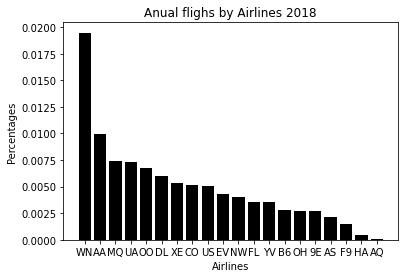

In [62]:
plt.title('Anual flighs by Airlines 2018')
plt.xlabel('Airlines')
plt.ylabel('Percentages')
Companies = df_2['Companies']
Percentages = df_2['Percentages']
labels, counts = (Companies,Percentages )
plt.bar(labels, counts, align='center', color = "black")
plt.savefig('Anual_flights_Percentage_BarChart.png') #save it
plt.show()

In [5]:
y = df.UniqueCarrier.value_counts()

labels = y.index

In [6]:
#explode will make some wedge in our chart. it will be helpful to highlight some parts of the chart

explode = [i/24 for i in range(3,len(y)+3)]
for x in explode[0:17]:
    explode[explode.index(x)]=0   #using just the last 3 elements
explode[-1] = 1.2

In [7]:
#here will define map of colors for our plotp

normdata = mpl.colors.Normalize(min(y), max(y))  
colormap = mpl.cm.Reds #this line allows us to change the colors
colors =colormap(normdata(y))

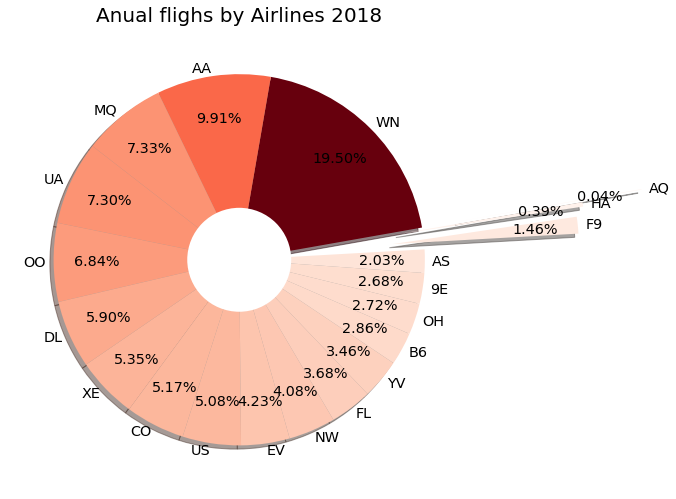

In [8]:
#ploting a pie chart

fig1, ax1 = plt.subplots(figsize=(10,12))

ax1.pie(y, explode=explode, labels=labels, autopct='%.2f%%',pctdistance=0.77,labeldistance=1.04,
        shadow=True, startangle=10, colors=colors,
       textprops={'size': 'x-large'})


ax1.set_title("Anual flighs by Airlines 2018",fontsize=20)

#plt.legend(title = "Airlines:",labels=labels,loc="bets")


#draw inner circle
centre_circle = plt.Circle((0,0),.28,fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)


plt.tight_layout()

plt.savefig('Anual_flights_PieChart.png') #save it

plt.show()

#### Let explore the numerical variable (ArrDelay)
I will use two ways to visualize the value of percentage of the flights per Airline.

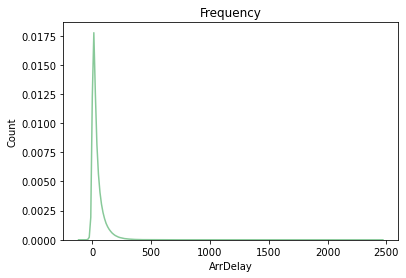

In [9]:
sns.kdeplot(df['ArrDelay'], color = "#88c999")
plt.title('Frequency')
plt.xlabel('ArrDelay')
plt.ylabel('Count')
plt.show()

#### Lets explore the data that caould be come from the analisis with a numeric and a categorical variable (ArrDelay and UniqueCarrier)

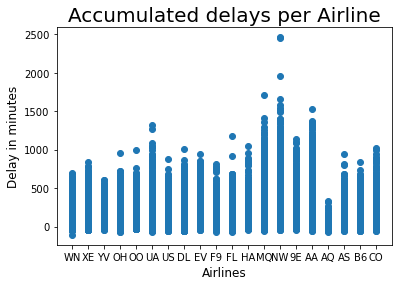

In [10]:
fig, ax = plt.subplots()
#ax.plot(df['UniqueCarrier'],df['ArrDelay'])
plt.scatter(df['UniqueCarrier'],df['ArrDelay'])
plt.title('Accumulated delays per Airline',fontsize=20)
plt.xlabel('Airlines', fontsize=12)
plt.ylabel('Delay in minutes', fontsize=12)
plt.show()

#### Lets explore the data that caould be come from the analisis with two numerical variables (ArrDelay and DepDelay).

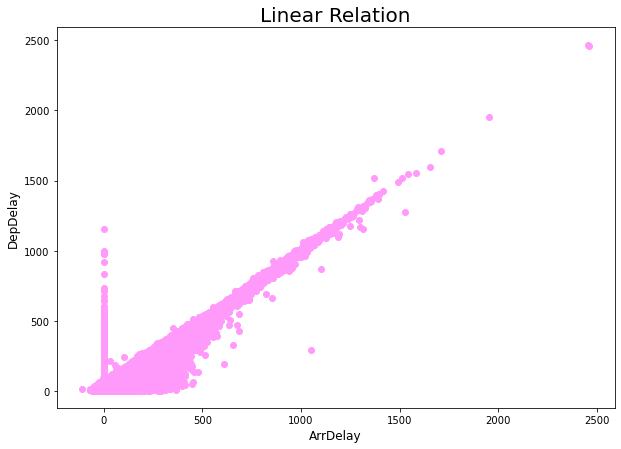

In [11]:
x= df["ArrDelay"]
y= df["DepDelay"]
plt.figure(figsize=(10,7))
plt.scatter(x, y, color = "#FF99FA")
plt.title('Linear Relation', fontsize=20)
plt.xlabel('ArrDelay', fontsize=12)
plt.ylabel('DepDelay', fontsize=12)

plt.savefig('Retation_Scatter.png')
plt.show()

#### Lets visualize the type of delay (Arrival and departure delays accomulated per airline. We are Three variables (ArrDelay, DepDelay and UniqueCarrier)


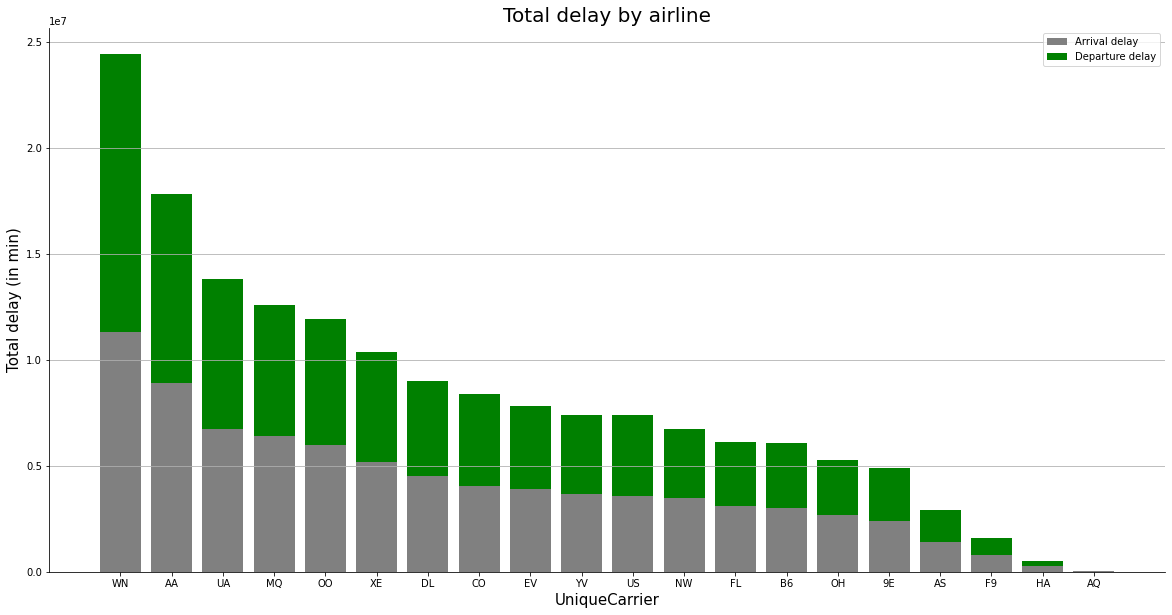

In [12]:
data = df[["UniqueCarrier","ArrDelay","DepDelay"]]

data = data.groupby("UniqueCarrier")[["ArrDelay","DepDelay"]].sum()

data= data.sort_values(by="ArrDelay", ascending=False)

labels = data.index

fig, ax = plt.subplots(figsize=(20,10))

ax.bar(data.index, data["ArrDelay"],label="Arrival delay", color = 'grey')
ax.bar(data.index, data["DepDelay"], bottom=data["ArrDelay"],label= "Departure delay",color='green')

ax.set_ylabel("Total delay (in min)", fontsize=15)
ax.set_xlabel("UniqueCarrier", fontsize=15)
ax.set_title("Total delay by airline",fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.grid(True)
ax.xaxis.grid(False)

plt.legend(loc="best")

plt.savefig('ArrDelay_DepDelay_UC_Stacker_bar.png')

plt.show()

#### Lets visualize more than 3 variables (ArrDelay, DepDelay, AirTime and UniqueCarrier).

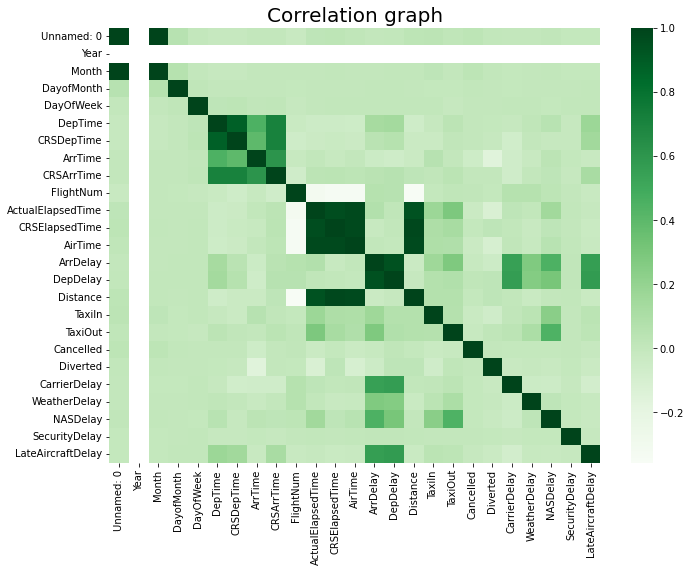

In [57]:
corr = df.corr()
plt.figure(figsize=(11,8))
plt.title('Correlation graph', fontsize=20)
sns.heatmap(corr, cmap="Greens")
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

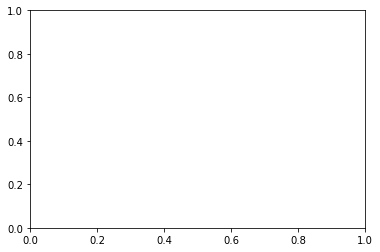

In [56]:
labels = np.unique(UniqueCarrier, return_counts=True)  
ArrDelay = df["ArrDelay"]
DepDelay = df["DepDelay"]
AirTime =  df["AirTime"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, ArrDelay, width, label='ArrDelay')
rects2 = ax.bar(x + width/3, DepDelay, width, label='DepDelay')
rects3 = ax.bar(x + width/3, AirTime, width, label='AirTime')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by ArrDelay, DepDelay, AirTime')
ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

### Exercises 2 Export graphics as images or as html.

In [ ]:
# plt.savefig("name.jpg")

### Exercises 3 Integrate graphical visualizations, in task 5, of Sprint 2.

I am going to viasualize the total amount of flights for each airline.

In [171]:
df4= df.groupby(df['UniqueCarrier']).count()
df4 = df4.rename(columns={'Unnamed: 0': 'NumberFlights'})
df4= df4.rename_axis('UniqueCarrier').reset_index()
df4

,UniqueCarrier,NumberFlights,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,9E,51885,51885,51885,51885,51885,51885,51885,51885,51885,...,51885,51885,51885,51885,51885,51885,51885,51885,51885,51885
1,AA,191865,191865,191865,191865,191865,191865,191865,191865,191865,...,191865,191865,191865,191865,191865,191865,191865,191865,191865,191865
2,AQ,750,750,750,750,750,750,750,750,750,...,750,750,750,750,750,750,750,750,750,750
3,AS,39293,39293,39293,39293,39293,39293,39293,39293,39293,...,39293,39293,39293,39293,39293,39293,39293,39293,39293,39293
4,B6,55315,55315,55315,55315,55315,55315,55315,55315,55315,...,55315,55315,55315,55315,55315,55315,55315,55315,55315,55315
5,CO,100195,100195,100195,100195,100195,100195,100195,100195,100195,...,100195,100195,100195,100195,100195,100195,100195,100195,100195,100195
6,DL,114238,114238,114238,114238,114238,114238,114238,114238,114238,...,114238,114238,114238,114238,114238,114238,114238,114238,114238,114238
7,EV,81877,81877,81877,81877,81877,81877,81877,81877,81877,...,81877,81877,81877,81877,81877,81877,81877,81877,81877,81877
8,F9,28269,28269,28269,28269,28269,28269,28269,28269,28269,...,28269,28269,28269,28269,28269,28269,28269,28269,28269,28269
9,FL,71284,71284,71284,71284,71284,71284,71284,71284,71284,...,71284,71284,71284,71284,71284,71284,71284,71284,71284,71284


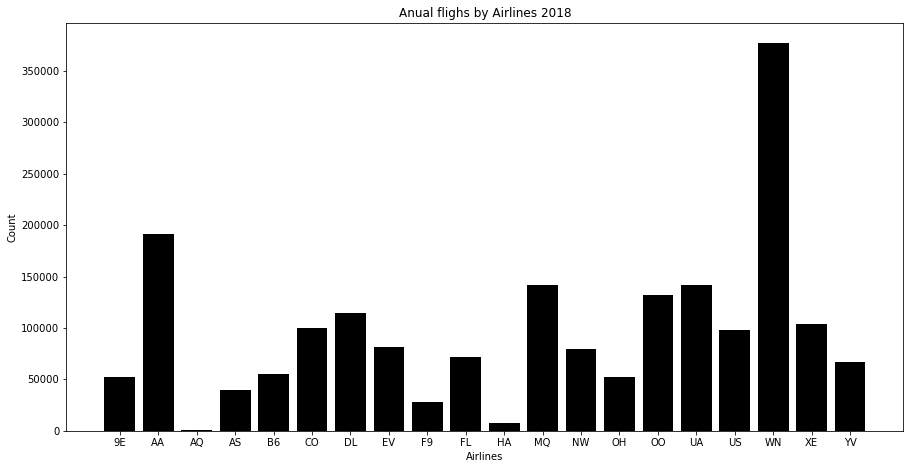

In [38]:
UniqueCarrier = df['UniqueCarrier']

labels, counts = np.unique(UniqueCarrier, return_counts=True,)
fig, ax = plt.subplots(figsize=(15,7.5))
plt.bar(labels, counts, align='center', color = "black")
plt.title('Anual flighs by Airlines 2018')
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.show()